<a href="https://colab.research.google.com/github/Shulliikkk/Researchs/blob/main/%D0%93%D0%A1%D0%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Схема выведения КА на ГСО:


1.   Выход на НОО высотой 400 км (1 и 2 ступень РН)
2.   Сообщение первого импульса и переход на ГПО (2 ступень РН)
3.   Сообщение второго импульса и переход на ГСО (3 ступень РН)



### Расчет оптимальной массы 3 ступени РН, необходимой для перехода КА с ГПО на ГСО

In [2]:
#=======БЛОК КОНСТАНТ=======
# Все величины, которые будут использоваться в дальнейшем, будут выражены в СИ, если не оговорено инного 
from numpy import sqrt, sin, cos, exp, pi, log
M = 5.9722E24 # масса Земли
R = 6371E3 # радиус Земли
G = 6.6743E-11 #гравитационная постоянная
mu = G * M # гравитационный параметр Земли

In [3]:
# высота и радиус НОО
h = 400e3 
r1 = R + h
# высота и радиус ГСО
H = 35786e3
r2 = R + H

r_ratio = r2/r1 #соотношение радиусов орбит 

v1 = sqrt(mu/r1) #орбитальная скорость на НОО
v_apo = sqrt(mu * (2/r2 - 2/(r1 + r2))) #скорость в апогее ГПО

dv1 = v1*(sqrt(2*r_ratio/(r_ratio + 1)) - 1) #приращение скорости, необходимое для перехода с НОО на ГПО (пригодится в дальнейшем)
dv2 = v1/sqrt(r_ratio) * (1 - sqrt(2/(r_ratio + 1))) #приращение скорости в апогее ГПО, необходимое для перехода на ГСО

print('v1 =', v1)
print('dv1 =', dv1)
print('dv2 =', dv2)
print('dv1 + dv2 =', dv1 + dv2)
print('v1 + dv1 + dv2 =', v1 + dv1 + dv2)


v1 = 7672.618886595345
dv1 = 2399.3584848363753
dv2 = 1457.2301295227762
dv1 + dv2 = 3856.5886143591515
v1 + dv1 + dv2 = 11529.207500954497


Зададим некоторые параметры 3 ступени РН


In [4]:
# масса ПН (КА)
m_s = 5 

# параметры двигателя (тяга выбрана 20 кН, что примерно равно тяге двигателя разгонного блока Фрегат)
u3 = 500 # скорость истечения газов из сопла оностительно ракеты
mu3 = 40 # расход топлива
m_eng = 75 # масса двигателя
m_c = 20 # масса конструкции:)

M3_empt = m_s + m_eng + m_c

По формуле Циолковского рассчитаем массу топлива, необходимую для данного маневра

$$1457 = u_3\ln{\frac{m_s + m_{eng} + m_c + m_f}{m_s + m_{eng} + m_c}} = 500\ln{\frac{100 + m_f}{100}}$$ 

$$m_f = 1743 \; kg$$

Уточним её

In [5]:
dt = 0.001
for m_f in range(1740, 1900, 1):
  # координаты апоцентра ГПО
  x = -r2
  y = 0
  # компоненты начначальной скорости
  vx = 0
  vy = -v_apo
  m = M3_empt + m_f
  m0 = m
  f = True # флаг, показывающий, хватило ли топлива 
  while sqrt(vx**2 + vy**2) < v_apo + dv2:
    r = sqrt(x**2 + y**2) # модуль радиус-вектора
    x += vx*dt
    y += vy*dt
    ax = -mu/r**2 * x/r - mu3*u3/m * y/r
    ay = -mu/r**2 * y/r + mu3*u3/m * x/r
    vx += ax*dt
    vy += ay*dt
    if m - mu3*dt > M3_empt:
      m -= mu3*dt
    else:
      f = False
      break
  if f:
    print(m0)
    break

1845


Получим $1845$ и округлим до $1850$, поскольку расчеты велись для идеального случая точного попадания на ГСО

Таким образом уточненная масса топлива равна $m_f = 1850 \; kg$, а оптимальная масса всей 3 ступени $M_{III} = 1950 \; kg$


### Ориентировочное определение весовых характеристик ступеней РН


Введем коэффициент $\gamma$, показывающий сооотношение между массами ступеней:
$$\gamma = \frac{M_{II}}{M_I}$$

Характеристическая скорость 1 ступени:

$$\Delta v_I = u_1\ln{\frac{M_I + M_{II} + M_{III}}{kM_I + M_{II} + M_{III}}} = u_1\ln{\frac{M_{III} + M_{I}(1 + \gamma)}{M_{III} + M_{I}(k + \gamma)}}$$

Характеристическая скорость 2 ступени:

$$\Delta v_{II} = u_2\ln{\frac{M_{II} + M_{III}}{kM_{II} + M_{III}}} = u_2\ln{\frac{M_{III} + \gamma M_{I}}{M_{III} + k \gamma M_{I}}}$$

Общая характеристическая скорость:

$$\Delta v = \Delta v_I + \Delta v_{II} = v_1 + \Delta v_1 = 7672.6 + 2399.4 = 10072 \; m/s$$

$$\Delta v = u_1\ln{\frac{M_{III} + M_{I}(1 + \gamma)}{M_{III} + M_{I}(k + \gamma)}} + u_2\ln{\frac{M_{III} + \gamma M_{I}}{M_{III} + k \gamma M_{I}}}$$

Добавим к характеристической скорости потери на преодоление сопротивления атмосферы и притяжения Земли $\approx 2000 \; m/s$

Получим:

$$12100 = 4000\ln{\frac{1950 + M_{I}(1 + \gamma)}{1950 + M_{I}(0.05 + \gamma)}} + 3500\ln{\frac{1950 + \gamma M_{I}}{1950 + 0.05 \gamma M_{I}}}$$

Последовательно переберем $\gamma$ от 0.01 до 0.99 с шагом 0.01 и проведем оптимизацию по критерию $M_I + M_{II} \to min$

Решать данное уравнение будем методом бисекции

In [6]:
k = 0.05
M3 = 1950
u1 = 4000 
u2 = 3500 
dv = 12100
def f(m1):
  return u1*log((M3 + m1*(1 + gamma))/(M3 + m1*(k + gamma))) + u2*log((M3 + gamma*m1)/(M3 + k*gamma*m1)) - dv
gamma_opt = 1
M_opt = float('inf')
for gamma in range(1, 100):
  gamma /= 100
  l = 0
  r_ = 200e3
  e = 1
  while r_ - l > 2 * e:
    mid = (r_ + l) / 2
    if f(l) * f(mid) < 0:
      r_ = mid
    else:
      l = mid
  if M_opt > mid + gamma*mid:
    gamma_opt = gamma
    M_opt = mid + gamma*mid
    M1_opt = mid
    M2_opt = mid*gamma
print(gamma_opt)
print('Масса 1 ступени:', M1_opt)
print('Масса 2 ступени:', M2_opt)
print('Общая масса:', M1_opt + M2_opt + M3)
  #print(gamma, 'm2 =', round((mid*gamma + M3)/1000, 2), 'm =', round((mid + mid*gamma + M3)/1000, 2), u1*log((m + mid*(1 + gamma))/(m + mid*(k + gamma))), u2*log((m + gamma*mid)/(m + k*gamma*mid)))

0.11
Масса 1 ступени: 68186.95068359375
Масса 2 ступени: 7500.5645751953125
Общая масса: 77637.51525878906


Таким образом:

Масса 1 ступени $M_I \approx 68 \; ton$

Масса 2 ступени $M_{II} \approx 7.5 \; ton$

Масса 3 ступени $M_{III} \approx 1.95 \; ton$

Общая масса $M \approx 77.6 \; ton$

### Расчет параметров выведения

Введем плоскоую систему координат с началом в центре Земли, осью $y$, напрвленной на точку старта и осью $x$, перпендикулярной ей.

За угол $\alpha$ обозначим угол между векторм скорости РН и осью $x$

За угол $\theta$ обозначим угол между векторм скорости РН и местным горизонтом (угол тангажа)

За угол $\varphi$ обозначим угол между радиус-вектором РН и осью $x$ 


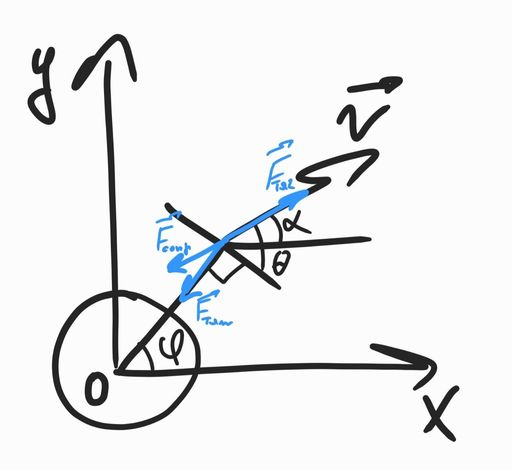

Запишем соотношение между этими углами:  
$\alpha = \theta \; + \varphi \; - \pi/2$

На данный угол в каждый момент времени должен быть отклонен вектор скорости РН, чтобы выйти на заданную орбиту

Во время полета угол тангажа $\theta$ должен меняться от $\pi/2$ (в момент старта) до $0$ (выход на НОО).

Программу тангажа представим в виде следующей функции:    

$$\theta(\mu_t) = V\mu_t + A$$

где $\theta \; - $ текущий угол тангажа; $\mu_t \; - $ текущая относительная масса; $V, \; A \; -$ некие коэффициенты

Для начального и конечного момента времени запишем:    

$$\theta(\mu_{t0}) = \theta_0 = V\mu_{t0} + A$$
$$\theta(\mu_{tk}) = \theta_k = V\mu_{tk} + A$$

Получим:    

$$V = \frac{\theta_0 - \theta_k}{\mu_{t0} - \mu_{tk}}$$

$$A = \theta_0 - \frac{\theta_0 - \theta_k}{\mu_{t0} - \mu_{tk}}\mu_{t0}$$

Запишем уравнения движения РН:    
$$x = \frac{dv_x}{dt}$$

$$y = \frac{dv_y}{dt}$$

$$v_x = \frac{da_x}{dt}$$

$$v_y = \frac{da_y}{dt}$$

$$a_x = \frac{\mu_1u_1}{m}\cos{\alpha} -\frac{GM}{x^2 + y^2}\cos{\varphi} \; - C_x\frac{S}{m}\frac{v_x^2 + v_y^2}{2}\rho\cos{\alpha}$$

$$a_y = \frac{\mu_1u_1}{m}\sin{\alpha} -\frac{GM}{x^2 + y^2}\sin{\varphi} \; - C_x\frac{S}{m}\frac{v_x^2 + v_y^2}{2}\rho\sin{\alpha}$$

Численно проинтегрируем их с учетом программы тангажа

In [8]:
from math import sqrt, cos, sin, pi, exp, log, asin, degrees

M3 = 1945 

mu1 = 300 
mu2 = 200 

u1 = 4000 
u2 = 3500 

S = 2 
Cx = 0.4
k = 0.05

#плотность атмосферы
def ro(h):
  ro0 = 1.2 #кг/м^3
  h0 = 9000 #м
  if h <= 10*h0:
    return ro0*exp(-h/h0)
  else:
    return 0

#ускорение свободного падения
def g(h):
  return mu/(R + h)**2

#программа тангажа
def teta(mu_t, stage):
  if stage == 1:
    #начальный и конечный угол тангажа 1 ступени
    teta_0 = pi/2
    teta_end = teta_aver
    #начальная и конечная относительная масса 1 ступени
    mu_0 = 1
    mu_end = (k*M1 + M2 + M3)/(M1 + M2 + M3)
  if stage == 2:
    #начальный и конечный угол тангажа 2 ступени
    teta_0 = teta_aver
    teta_end = 0
    #начальная и конечная относительная масса 2 ступени
    mu_0 = 1
    mu_end = (M3 + m_f)/(M2 + M3)  #начальный и конечный угол тангажа 2 ступени
  #коэффициенты
  V = (teta_0 - teta_end)/(mu_0 - mu_end)
  A = teta_0 - V*mu_0
  return V*mu_t + A

#оптимизационное уравнение для масс ступеней
def f(m1):
  return u1*log((M3 + m1*(1 + gamma))/(M3 + m1*(k + gamma))) + u2*log((M3 + gamma*m1)/(M3 + k*gamma*m1)) - dv

M0_opt = float('inf')
# т.к. мы точно не знаем, сколько характеристической скорости понадобится для выхода на ноо и перехода на гпо,
# сделаем перебор по возможным dv
for dv in range(12100, 13000, 100):
  #найдем оптимальные массы 1 и 2 ступени
  M_opt = float('inf')
  for gamma in range(1, 100):
    gamma /= 100
    l = 0
    r_ = 200e3
    e = 1
    while r_ - l > 2 * e:
      mid = (r_ + l) / 2
      if f(l) * f(mid) < 0:
        r_ = mid
      else:
        l = mid
    if M_opt > mid + gamma*mid:
      M_opt = mid + gamma*mid
      M1 = mid
      M2 = mid*gamma

  # чтобы обеспечить точный выход по высоте на заданную орбиту
  # переберем конечный угол тангажа 1 ступени
  for teta_aver in range(50, 80):
    teta_aver *= pi/180
    #начальные параметры
    dt = 0.01
    x = [0]
    y = [R]
    vx = 0
    vy = 0
    m = M1 + M2 + M3
    m0 = M1 + M2 + M3
    step = 0
    # пока не отработали 1 ступень:
    while m >= k*M1 + M2 + M3:
      r = sqrt(x[step]**2 + y[step]**2) # модуль радиус-вектора
      v = sqrt(vy**2 + vx**2) # модуль скорости
      mu_t = m/m0 # текущее значение относительной массы
      # считаем угол, который должен быть между вектором скорости и осью абсцисс
      # чтобы выполнять заданную программу тангажа
      if v < 340:
        alph = pi/2
      else:
        alph = teta(mu_t, 1) + asin(y[step]/r) - pi/2
      # меняем курс
      vx = v*cos(alph)
      vy = v*sin(alph)
      #считаем ускорения
      ax = mu1*u1*cos(alph)/m - g(r - R)*(x[step]/r) - (0.5*Cx*S*ro(r - R)*(v**2)*cos(alph))/m
      ay = mu1*u1*sin(alph)/m - g(r - R)*(y[step]/r) - (0.5*Cx*S*ro(r - R)*(v**2)*sin(alph))/m
      # меняем координаты
      x.append(x[step] + vx*dt)
      y.append(y[step] + vy*dt)
      # меняем скорости
      vx += ax*dt
      vy += ay*dt
      # меняем массу
      m -= mu1*dt
      step += 1

    #считаем необходимое изменение скорости для выхода на заданную орбиту
    delta_v = v1 - v
    #считаем примерную остаточную массу 2 ступени
    m_fin = (M2 + M3)*exp(-delta_v/u2) - M3
    # сохраняем положение и скорость ракеты после отработки 1 ступени
    X = x[:]
    Y = y[:]
    VX = vx
    VY = vy
    start_step = step
    m_fin = round(m_fin)
    # чтобы обеспечить заданную орбитальную скорость
    # переберем остаточные массы 2 ступени, опираясь на вычисленное раннее приближенное значение
    for m_f in range(m_fin - 500, m_fin + 500, 10):
      #начальные массы без учета 1 ступени
      m = M2 + M3
      m0 = M2 + M3
      #за начальные параметры берутся параметры после отработки 1 ступени
      x = X[:]
      y = Y[:]
      vx = VX
      vy = VY
      step = start_step
      while m >= M3 + m_f:
        r = sqrt(x[step]**2 + y[step]**2)
        v = sqrt(vy**2 + vx**2)
        mu_t = m/m0
        alph = teta(mu_t, 2) + asin(y[step]/r) - pi/2
        vx = v*cos(alph)
        vy = v*sin(alph)
        ax = mu2*u2*cos(alph)/m - g(r - R)*(x[step]/r) - (0.5*Cx*S*ro(r - R)*(v**2)*cos(alph))/m
        ay = mu2*u2*sin(alph)/m - g(r - R)*(y[step]/r) - (0.5*Cx*S*ro(r - R)*(v**2)*sin(alph))/m
        x.append(x[step] + vx*dt)
        y.append(y[step] + vy*dt)
        vx += ax*dt
        vy += ay*dt
        m -= mu2*dt
        step += 1
      # если высота и скорость с определенной точностью соответствует заданным параметрам ноо
      # то производим повторное включение двигателя и смотрим, хватает ли текущей массы для перехода на гпо
      # если хватет, то выбираем те параметры РН, которые соответствуют минимальной стартовой массе
      GPO = True
      if abs(v1 - sqrt(vy**2 + vx**2)) < 5 and abs(h - (r - R)) < 1e3:
        v_orbit = v
        while v < v_orbit + dv1:
          r = sqrt(x[step]**2 + y[step]**2)
          v = sqrt(vy**2 + vx**2)
          ax = (-mu/r**2) * (x[step]/r) + (mu2*u2/m) * (vx/v)
          ay = (-mu/r**2) * (y[step]/r) + (mu2*u2/m) * (vy/v)
          x.append(x[step] + vx*dt)
          y.append(y[step] + vy*dt)
          vx += ax*dt
          vy += ay*dt
          if m > k*M2 + M3:
            m -= mu2*dt
          else:
            GPO = False
            break
          step += 1
        if GPO != False: #and M1 + M2 + M3 < M0_opt
          if M1 + M2 + M3 < M0_opt:
            h_opt = r - R
            v_opt = v_orbit
            M0_opt = M1 + M2 + M3
            M1_opt = M1
            M2_opt = M2
            teta_aver_opt = degrees(teta_aver)
            m_f_opt = m_f
        GPO = True
print('h_orbit =', round(h_opt))
print('v_orbit =', round(v_opt, 1))
print('M0 =', round(M0_opt, 1))
print('M1 = ', round(M1_opt, 1))
print('M2 = ', round(M2_opt, 1))
print('teta_aver =', teta_aver_opt)
print('m_f =', m_f_opt)

h_orbit = 400403
v_orbit = 7674.2
M0 = 96306.7
M1 =  85783.4
M2 =  8578.3
teta_aver = 56.0
m_f = 2814


Отделение 1-й ступени. Включение двигателя 2-й ступени
T = 00:04:31
h = 325730.0456669787
v = 5011.9140570976815
Выход на НОО. Выключение двигателя 2-й ступени
T = 00:05:00
h = 400271.7445787173
v = 7674.262284956692


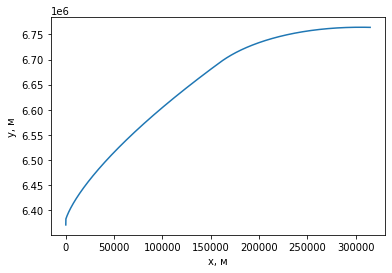

Включение двигателя 2-й ступени
T = 00:27:25
h = 403671.15618146956
v = 7670.572689970714
Выключение двигателя 2-й ступени. Отделение 2-й ступени
T = 00:27:37
h = 403844.79834158253
v = 10068.884776806177
Включение двигателя 3-й ступени
T = 05:42:36
h = 35812027.06635431
v = 1617.3511043627504
Выключение двигателя 3-й ступени. Отделение КА от 3-й ступени
T = 05:44:58
h = 35815638.41455498
v = 3073.51063110774


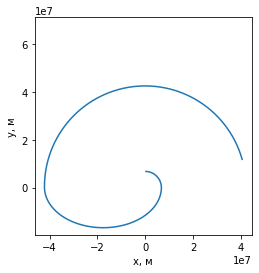

In [8]:
from math import sqrt, cos, sin, pi, exp, log, asin, degrees
import matplotlib.pyplot as plt
import time
#92506.40869140625 9250.640869140625 54.0 2908
M1 =  85783.4
M2 =  8578.3
M3 = 1945 

mu1 = 300 
mu2 = 200
mu3 = 40 

u1 = 4000 
u2 = 3500
u3 = 500

S = 2 
Cx = 0.4
k = 0.05

#плотность атмосферы
def ro(h):
  ro0 = 1.2 #кг/м^3
  h0 = 9000 #м
  if h <= 10*h0:
    return ro0*exp(-h/h0)
  else:
    return 0

#ускорение свободного падения
def g(h):
  return mu/(R + h)**2

#программа тангажа
teta_aver = 56.0*pi/180
m_f = 2815
def teta(mu_t, stage):
  if stage == 1:
    #начальный и конечный угол тангажа 1 ступени
    teta_0 = pi/2
    teta_end = teta_aver
    #начальная и конечная относительная масса 1 ступени
    mu_0 = 1
    mu_end = (k*M1 + M2 + M3)/(M1 + M2 + M3)
  if stage == 2:
    #начальный и конечный угол тангажа 2 ступени
    teta_0 = teta_aver
    teta_end = 0
    #начальная и конечная относительная масса 2 ступени
    mu_0 = 1
    mu_end = (M3 + m_f)/(M2 + M3)  #начальный и конечный угол тангажа 2 ступени
  #коэффициенты
  V = (teta_0 - teta_end)/(mu_0 - mu_end)
  A = teta_0 - V*mu_0
  return V*mu_t + A

#начальные параметры
dt = 0.001
x = [0]
y = [R]
vx = 0
vy = 0
m = M1 + M2 + M3
m0 = M1 + M2 + M3
step = 0
t = 0
# пока не отработали 1 ступень:
while m >= k*M1 + M2 + M3:
  r = sqrt(x[step]**2 + y[step]**2) # модуль радиус-вектора
  v = sqrt(vy**2 + vx**2) # модуль скорости
  mu_t = m/m0 # текущее значение относительной массы
  # считаем угол, который должен быть между вектором скорости и осью абсцисс
  # чтобы выполнять заданную программу тангажа
  if v < 340:
    alph = pi/2
  else:
    alph = teta(mu_t, 1) + asin(y[step]/r) - pi/2
  # меняем курс
  vx = v*cos(alph)
  vy = v*sin(alph)
  #считаем ускорения
  ax = mu1*u1*cos(alph)/m - g(r - R)*(x[step]/r) - (0.5*Cx*S*ro(r - R)*(v**2)*cos(alph))/m
  ay = mu1*u1*sin(alph)/m - g(r - R)*(y[step]/r) - (0.5*Cx*S*ro(r - R)*(v**2)*sin(alph))/m
  # меняем координаты
  x.append(x[step] + vx*dt)
  y.append(y[step] + vy*dt)
  # меняем скорости
  vx += ax*dt
  vy += ay*dt
  # меняем массу
  m -= mu1*dt
  step += 1
  t += dt
print('Отделение 1-й ступени.', 'Включение двигателя 2-й ступени')
print('T =', time.strftime("%H:%M:%S",time.gmtime(t)))
print('h =', r - R)
print('v =', v)

m = M2 + M3
m0 = M2 + M3
while m >= M3 + m_f:
  r = sqrt(x[step]**2 + y[step]**2)
  v = sqrt(vy**2 + vx**2)
  mu_t = m/m0
  alph = teta(mu_t, 2) + asin(y[step]/r) - pi/2
  vx = v*cos(alph)
  vy = v*sin(alph)
  ax = mu2*u2*cos(alph)/m - g(r - R)*(x[step]/r) - (0.5*Cx*S*ro(r - R)*(v**2)*cos(alph))/m
  ay = mu2*u2*sin(alph)/m - g(r - R)*(y[step]/r) - (0.5*Cx*S*ro(r - R)*(v**2)*sin(alph))/m
  x.append(x[step] + vx*dt)
  y.append(y[step] + vy*dt)
  vx += ax*dt
  vy += ay*dt
  m -= mu2*dt
  step += 1
  t += dt
print('Выход на НОО.', 'Выключение двигателя 2-й ступени')
print('T =', time.strftime("%H:%M:%S",time.gmtime(t)))
print('h =', r - R)
print('v =', v)
plt.xlabel("x, м")
plt.ylabel("y, м")
plt.plot(x, y)
plt.show()

x = [x[step]]
y = [y[step]]
eng_dv1_on = False
eng_dv2_on = False
block_eng_1 = False
block_eng_2 = False
telemetry2 = False
telemetry3 = False
step = 0
t_orbit = 0
while t_orbit < 60000:
  r = sqrt(x[step]**2 + y[step]**2)
  v = sqrt(vx**2 + vy**2)
  if block_eng_1 == False and eng_dv1_on == False and abs(y[step]) < 10 and x[step] > 0:
    print('Включение двигателя 2-й ступени')
    print('T =', time.strftime("%H:%M:%S",time.gmtime(t)))
    print('h =', r - R)
    print('v =', v)
    eng_dv1_on = True
    a = (r2 + r)/2
    v_ell_dv1 = sqrt(mu*(2/r - 1/a))
  if block_eng_2 == False and eng_dv2_on == False and abs(y[step]) < 10 and x[step] < 0:
    print('Включение двигателя 3-й ступени')
    print('T =', time.strftime("%H:%M:%S",time.gmtime(t)))
    print('h =', r - R)
    print('v =', v)
    eng_dv2_on = True
    a = (r2 + r)/2
    v_ell_dv2 = sqrt(mu*(2/r - 1/a))

  if eng_dv1_on or eng_dv2_on:
    if eng_dv1_on and v < v_ell_dv1: 
      ax = -g(r - R)*(x[step]/r) + (mu2*u2/m) * (vx/v)
      ay = -g(r - R)*(y[step]/r) + (mu2*u2/m) * (vy/v)
      m -= mu2*dt
      telemetry2 = True
    else:
      if telemetry2:
        print('Выключение двигателя 2-й ступени.', 'Отделение 2-й ступени')
        print('T =', time.strftime("%H:%M:%S",time.gmtime(t)))
        print('h =', r - R)
        print('v =', v)
        telemetry2 = False
        eng_dv1_on = False
        block_eng_1 = True
      m = M3
    if eng_dv2_on and v < v_ell_dv2:
      ax = -g(r - R)*(x[step]/r) + (mu3*u3/m) * (vx/v)
      ay = -g(r - R)*(y[step]/r) + (mu3*u3/m) * (vy/v)
      m -= mu3*dt
      telemetry3 = True
    else:
      if telemetry3:
        print('Выключение двигателя 3-й ступени.', 'Отделение КА от 3-й ступени')
        print('T =', time.strftime("%H:%M:%S",time.gmtime(t)))
        print('h =', r - R)
        print('v =', v)
        telemetry3 = False
        eng_dv2_on = False
        block_eng_2 = True
  else:
    ax = -g(r - R)*(x[step]/r)
    ay = -g(r - R)*(y[step]/r)
  x.append(x[step] + vx*dt)
  y.append(y[step] + vy*dt)
  vx += ax*dt
  vy += ay*dt
  step += 1
  t += dt
  t_orbit += dt

plt.xlabel("x, м")
plt.ylabel("y, м")
plt.plot(x, y)
plt.axis('square')
plt.show()

На большее время симуляция, к сожалению, невозможна, т.к. заканчивется память :(